# 1. Lý thuyết

1)  Đặc diểm của kiến trúc RNN là gì ?

A. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trong tương lai được sử dụng như input của step hiện tại.

B. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện một cách song song và output của các step trước được sử dụng như input của step hiện tại.

C. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo tuần tự thời gian và output của các step trước được sử dụng như input của step hiện tại.

D. RNN là kiến trúc dự báo có tính thứ tự và tính truy hồi. Các dự báo được thực hiện theo chiều từ phải sang trái cho tới khi trở về vị trí đầu tiên.

Đáp án 1C

2) Nhận định nào sau đây là đúng về RNN?

A. Kiến trúc RNN dự báo song song các output một lúc.

B. Kiến trúc RNN không chia sẻ tham số giữa các units. Do đó kích thước mạng sẽ gia tăng theo độ dài văn bản.

C. Kiến trúc RNN có thể tổng hợp được thông tin trong tương lai để dự báo hiện tại.

D. Kiến trúc RNN chia sẻ tham số trên toàn bộ các units nên số lượng tham số không phụ thuộc vào độ dài văn bản.

Đáp án 2D

3) Để huấn luyện mạng RNN thì một chú ý quan trọng tại time step t=0 chúng ta cần làm gì ?

A. Mã hóa từ đầu vào thành một ma trận đại số.

B. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị phân phối xác suất của biến mục tiêu.

C. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng mã hóa biểu diễn cho từ đầu vào tại bước $t=0$.

D. Khởi tạo ngẫu nhiên một véc tơ kích hoạt $a^{<0>}$ như một giá trị có tác dụng kích hoạt tính toán.

Đáp án 3D

4) Sự khác biệt giữa RNN và CNN là gì?

A. RNN là kiến trúc truy hồi có thể trả ra kết quả dự báo ở nhiều timestep. CNN không có khả năng truy hồi để dự báo theo timestep

B. RNN có tính truy hồi và kiến trúc không chia sẻ tham số giữa các units. Trong khi CNN chia sẻ tham số ở phân phối xác suất đầu ra. 

C. RNN có số lượng tham số thay đổi theo độ dài văn bản. Trong khi đó CNN luôn có số lượng tham số xác định trước.

D. RNN có thể dự báo theo một chiều trong khi CNN chỉ dự báo được theo hai chiều.

Đáp án 4A

5) Véc tơ context trong kiến trúc LSTM và GRU có tác dụng gì ?

A. Là véc tơ biểu diễn của đầu vào $x_t$ tại mỗi bước.

B. Ghi nhận bối cảnh xuyên suốt toàn bộ chuỗi tính đến thời điểm hiện tại

C. Là véc tơ cập nhật và loại bỏ thông tin mới tại mỗi bước.

D. Kích hoạt thông tin tại mỗi timestep

Đáp án 5B



# 2. Thực hành


6. Từ bộ dữ liệu [Sentiment-analysis-on-movie-reviews](https://www.kaggle.com/competitions/sentiment-analysis-on-movie-reviews/data) hãy sử dụng các thuật toán trong RNN để huấn luyện mô hình phân loại cảm xúc văn bản. (1 điểm)

7. Sử dụng mô hình LSTM để dự báo tổng số lượng khách hàng sử dụng dịch vụ hàng không [air- passengers](https://www.kaggle.com/datasets/rakannimer/air-passengers) (2 điểm)

8. Xây dựng một mô hình thêm dấu Tiếng Việt sử dụng LSTM. Cách xử lý để tạo bộ dữ liệu có thể tham khảo tại [them dau tieng viet](https://phamdinhkhanh.github.io/2020/05/28/TransformerThemDauTV.html#1-d%E1%BB%AF-li%E1%BB%87u). (2 điểm)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EXCERCISE 6

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Bidirectional,LSTM,GRU,SimpleRNN,Activation,Conv1D,MaxPool1D,Dropout
from keras.layers.embeddings import Embedding
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tqdm import tqdm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print("TF version: ", tf.__version__)
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TF version:  2.8.0
Default GPU Device: /device:GPU:0


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Kaggle/Sentiment Analysis on Movie Reviews/train.tsv.zip', sep = '\t')
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [ ]:
train_data.shape


(156060, 4)

In [ ]:
train_data.columns


Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [ ]:
train_data['Sentiment'].nunique()

5

In [ ]:
dist = train_data.groupby(["Sentiment"]).size()
dist

Sentiment
0     7072
1    27273
2    79582
3    32927
4     9206
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


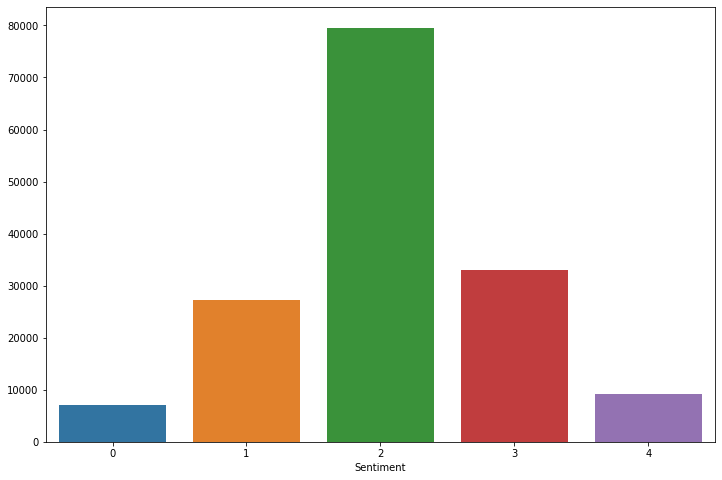

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(dist.keys(), dist.values);

CPU times: user 57.7 s, sys: 10.1 s, total: 1min 7s
Wall time: 58.6 s


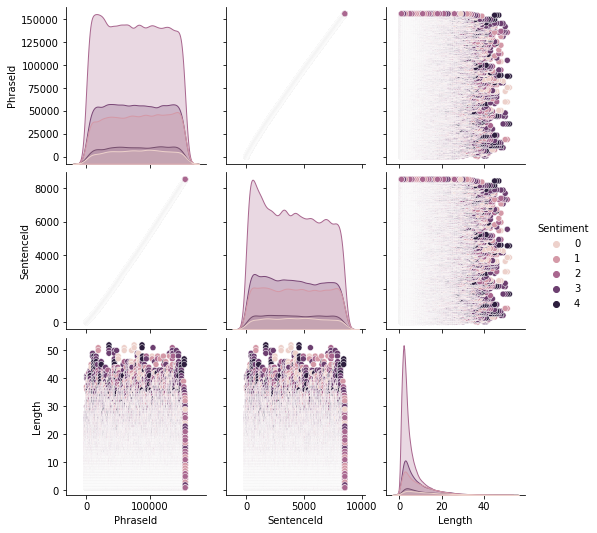

In [ ]:
%%time
train_data['Length'] = train_data['Phrase'].apply(lambda x: len(str(x).split(' ')))
sns.pairplot(train_data,hue='Sentiment',vars=['PhraseId','SentenceId','Length'])

Về bước clean thì cần 
- remove non-alphabetical
- chuyển câu thì từng từ riêng lẻ
- remove stopwords ( như i my mine myself it she on off in ...) 
- Lemmatizing , đưa về dạng V1 (Lemmatization khá giống Stemming nhưng  `Stemming uses the stem of the word, while lemmatization uses the context in which the word is being used` 
- Cuối cùng ghép từ lại

In [ ]:
def clean_sentences(df):
    
    reviews = []
    for sent in tqdm(df['Phrase']):
        # removing non-alphabetical characters 
        text = re.sub("[^a-zA-Z]"," ",sent)
        
        # Now tokenizing the sentence : 
        words = word_tokenize(text.lower())
        
        #removing stop words :
        new_words = [ ele for ele in words if ele.lower() not in stopwords.words('english') ]
        
        # Lemmatizing each word to its lemma
        lem = WordNetLemmatizer()
        lem_words = [lem.lemmatize(i) for i in new_words]
        
        #finally
        reviews.append(lem_words)
        
    return(reviews)

In [ ]:
%%time
train_sentences = clean_sentences(train_data)
print(len(train_sentences))

100%|██████████| 156060/156060 [03:52<00:00, 671.95it/s]

156060
CPU times: user 3min 17s, sys: 25.7 s, total: 3min 43s
Wall time: 3min 52s


In [ ]:
print(train_data['Phrase'][0])
print((" ").join(train_sentences[0]))

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story


In [ ]:
y_target = to_categorical(train_data['Sentiment'].values)


In [ ]:
y_target.shape

(156060, 5)

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(train_sentences,y_target,test_size = 0.2,stratify = y_target)


In [ ]:
X_train[5]

['drag', 'along']

In [ ]:
unique_words = set()
len_max = -1

for sent in tqdm(X_train):
    unique_words.update(sent)
    if(len_max < len(sent)):
        len_max = len(sent)

print('Words in vocab : ' , len(list(unique_words)))
print('Max_length : ' , len_max)

100%|██████████| 124848/124848 [00:00<00:00, 574003.17it/s]

Words in vocab :  13616
Max_length :  30


In [ ]:
vocab_size = len(list(unique_words))
embedding_dim = 300
max_length = len_max
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [ ]:
%%time
tokenizer = Tokenizer(num_words = vocab_size,
                      # filters = '#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      oov_token = oov_tok,
                      # lower = True,
                      char_level = False)

tokenizer.fit_on_texts(list(X_train))

# Training
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train,
                        maxlen = max_length,
                        padding = padding_type,
                        truncating = trunc_type)

# Validation
X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val,
                      maxlen = max_length,
                      padding = padding_type,
                      truncating = trunc_type)



CPU times: user 3.49 s, sys: 39.5 ms, total: 3.53 s
Wall time: 6.19 s


In [ ]:
print("X_training shape   : ",X_train.shape)
print("X_validation shape : ",X_val.shape)

X_training shape   :  (124848, 30)
X_validation shape :  (31212, 30)


In [ ]:
print(X_train[2])


[6205 7609  529   83  419 2827    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
model_rnn = Sequential()
model_rnn.add(Embedding(vocab_size,embedding_dim,input_length = max_length))
model_rnn.add(SimpleRNN(128,dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True))
model_rnn.add(SimpleRNN(64, dropout = 0.2, recurrent_dropout = 0.2, return_sequences=False))
model_rnn.add(Dense(128,activation = 'relu'))
model_rnn.add(Dense(y_target.shape[1],activation = 'softmax'))

model_rnn.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           4084800   
                                                                 
 simple_rnn (SimpleRNN)      (None, 30, 128)           54912     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 4,161,029
Trainable params: 4,161,029
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(min_delta = 0.001,
                               mode = 'max',
                               monitor = 'val_accuracy',
                               patience = 2)
callback = [early_stopping]

In [ ]:
%%time

num_epochs = 4

history_rnn = model_rnn.fit(X_train,y_train,
                    validation_data = (X_val, y_val),
                    epochs = num_epochs,
                    batch_size = 256,
                    verbose = 1,
                    callbacks = callback)

Epoch 1/4
488/488 [==============================] - 92s 171ms/step - loss: 1.2934 - accuracy: 0.5068 - val_loss: 1.2847 - val_accuracy: 0.5100
Epoch 2/4
488/488 [==============================] - 83s 171ms/step - loss: 1.2875 - accuracy: 0.5099 - val_loss: 1.2847 - val_accuracy: 0.5100
Epoch 3/4
488/488 [==============================] - 85s 174ms/step - loss: 1.2864 - accuracy: 0.5099 - val_loss: 1.2851 - val_accuracy: 0.5100
CPU times: user 5min 54s, sys: 57.2 s, total: 6min 52s
Wall time: 4min 21s


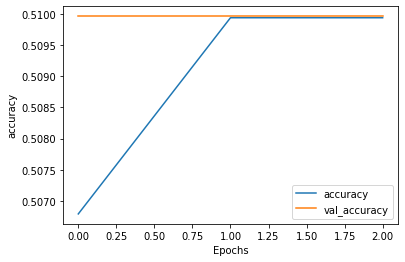

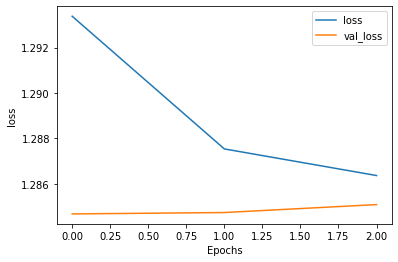

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history_rnn, 'accuracy')
plot_graphs(history_rnn, 'loss')

Không thể dùng được cuDNN vì lý do ...................

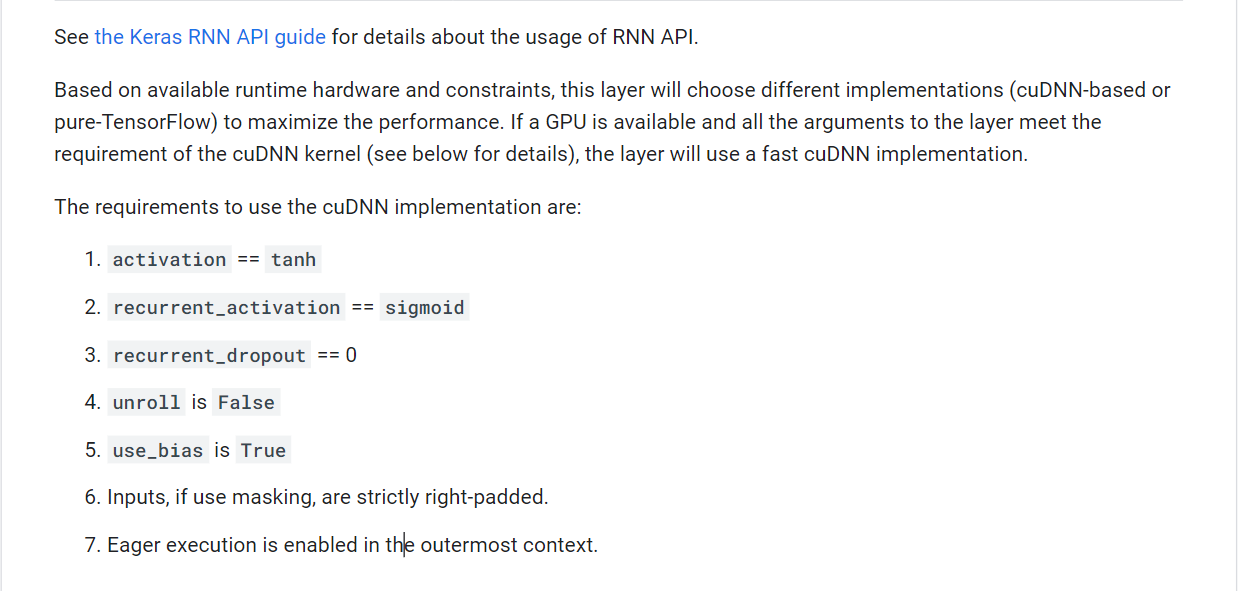

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(vocab_size,embedding_dim,input_length = max_length))
model_gru.add(Bidirectional(GRU(128,dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True)))
model_gru.add(Bidirectional(GRU(64, dropout = 0.2, recurrent_dropout = 0.2, return_sequences=False)))
model_gru.add(Dense(128,activation = 'LeakyReLU'))
model_gru.add(Dense(y_target.shape[1],activation = 'softmax'))

model_gru.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 300)           4084800   
                                                                 
 bidirectional (Bidirectiona  (None, 30, 256)          330240    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              123648    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 4,555,845
Trainable params: 4,555,845
No

In [ ]:
%%time

num_epochs = 4

history_gru = model_gru.fit(X_train,y_train,
                    validation_data = (X_val, y_val),
                    epochs = num_epochs,
                    batch_size = 256,
                    verbose = 1,
                    callbacks = callback)

Epoch 1/4
488/488 [==============================] - 425s 847ms/step - loss: 0.9717 - accuracy: 0.6061 - val_loss: 0.8679 - val_accuracy: 0.6491
Epoch 2/4
488/488 [==============================] - 417s 854ms/step - loss: 0.7919 - accuracy: 0.6747 - val_loss: 0.8337 - val_accuracy: 0.6622
Epoch 3/4
488/488 [==============================] - 414s 848ms/step - loss: 0.7210 - accuracy: 0.6997 - val_loss: 0.8278 - val_accuracy: 0.6636
Epoch 4/4
488/488 [==============================] - 409s 839ms/step - loss: 0.6720 - accuracy: 0.7161 - val_loss: 0.8406 - val_accuracy: 0.6599
CPU times: user 40min 14s, sys: 6min 57s, total: 47min 12s
Wall time: 28min 33s


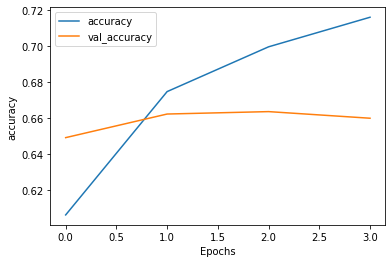

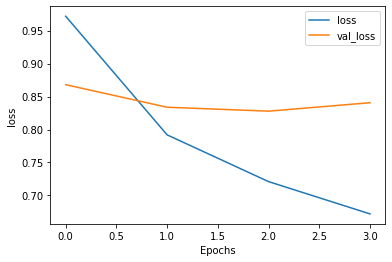

In [ ]:
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size,embedding_dim,input_length = max_length))
model_lstm.add(Bidirectional(LSTM(128,dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True)))
model_lstm.add(Bidirectional(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2, return_sequences=False)))
model_lstm.add(Dense(128,activation = 'ReLU'))
model_lstm.add(Dense(y_target.shape[1],activation = 'softmax'))

model_lstm.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 30, 300)           4084800   
                                                                 
 bidirectional_2 (Bidirectio  (None, 30, 256)          439296    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 4,705,605
Trainable params: 4,705,605
No

In [ ]:
%%time

num_epochs = 4

history = model_lstm.fit(X_train,y_train,
                    validation_data = (X_val, y_val),
                    epochs = num_epochs,
                    batch_size = 256,
                    verbose = 1,
                    callbacks = callback)

Epoch 1/4
488/488 [==============================] - 474s 948ms/step - loss: 0.9939 - accuracy: 0.6012 - val_loss: 0.8758 - val_accuracy: 0.6455
Epoch 2/4
488/488 [==============================] - 458s 938ms/step - loss: 0.8068 - accuracy: 0.6714 - val_loss: 0.8348 - val_accuracy: 0.6580
Epoch 3/4
488/488 [==============================] - 457s 937ms/step - loss: 0.7399 - accuracy: 0.6940 - val_loss: 0.8272 - val_accuracy: 0.6636
Epoch 4/4
488/488 [==============================] - 455s 933ms/step - loss: 0.6905 - accuracy: 0.7105 - val_loss: 0.8411 - val_accuracy: 0.6675
CPU times: user 44min 58s, sys: 8min 1s, total: 52min 59s
Wall time: 31min 33s


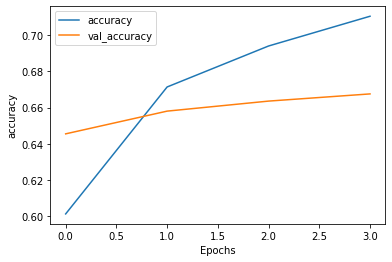

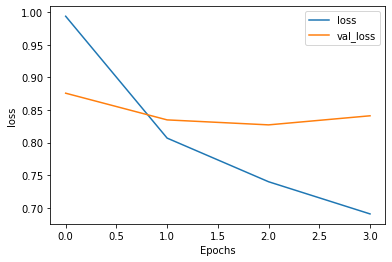

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Nhìn chung bidirectional LSTM tốt hơn

#EXCERCISE 7

In [ ]:
def plot_decompose(decompose_result):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,20))
    decompose_result.observed.plot(legend=False,ax=ax1,fontsize = 20,grid=True,linewidth = 3)
    ax1.set_ylabel("Observed",fontsize = 20)
    decompose_result.trend.plot(legend=False,ax=ax2,fontsize = 20,grid=True,linewidth = 3)
    ax2.set_ylabel("Trend",fontsize = 20)
    decompose_result.seasonal.plot(legend=False,ax=ax3,fontsize = 20,grid=True,linewidth = 3)
    ax3.set_ylabel("Seasonal",fontsize = 20)
    decompose_result.resid.plot(legend=False,ax=ax4,fontsize = 20,grid=True,linewidth = 3)
    ax4.set_ylabel("Residual",fontsize = 20)
    

In [ ]:
flight_data = pd.read_csv('/content/drive/MyDrive/Kaggle/Air Passengers/AirPassengers.csv')
cm = sns.light_palette("red", as_cmap=True)
flight_data.style.background_gradient(cmap=cm)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [ ]:
print(flight_data.describe())
print('-'*40)
print(flight_data.tail())

       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000
----------------------------------------
       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


In [ ]:
flight_data.shape

(144, 2)

In [ ]:
flight_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


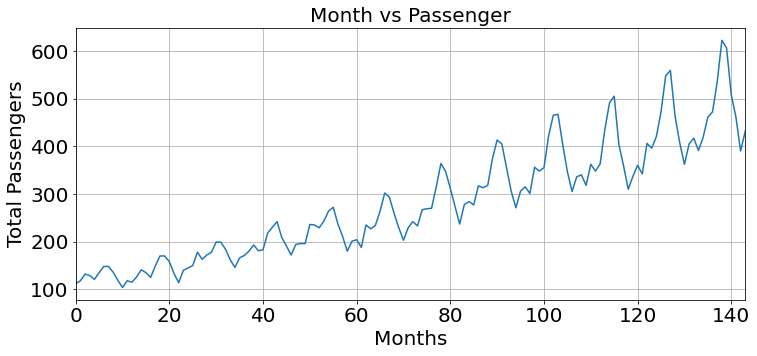

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Month vs Passenger',fontsize = 20)
plt.ylabel('Total Passengers',fontsize = 20)
plt.xlabel('Months',fontsize = 20)
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(flight_data['#Passengers'])

In [ ]:
flight_data['#Passengers']


0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

In [ ]:
!pip upgrade statsmodels

ERROR: unknown command "upgrade"


0.10.2


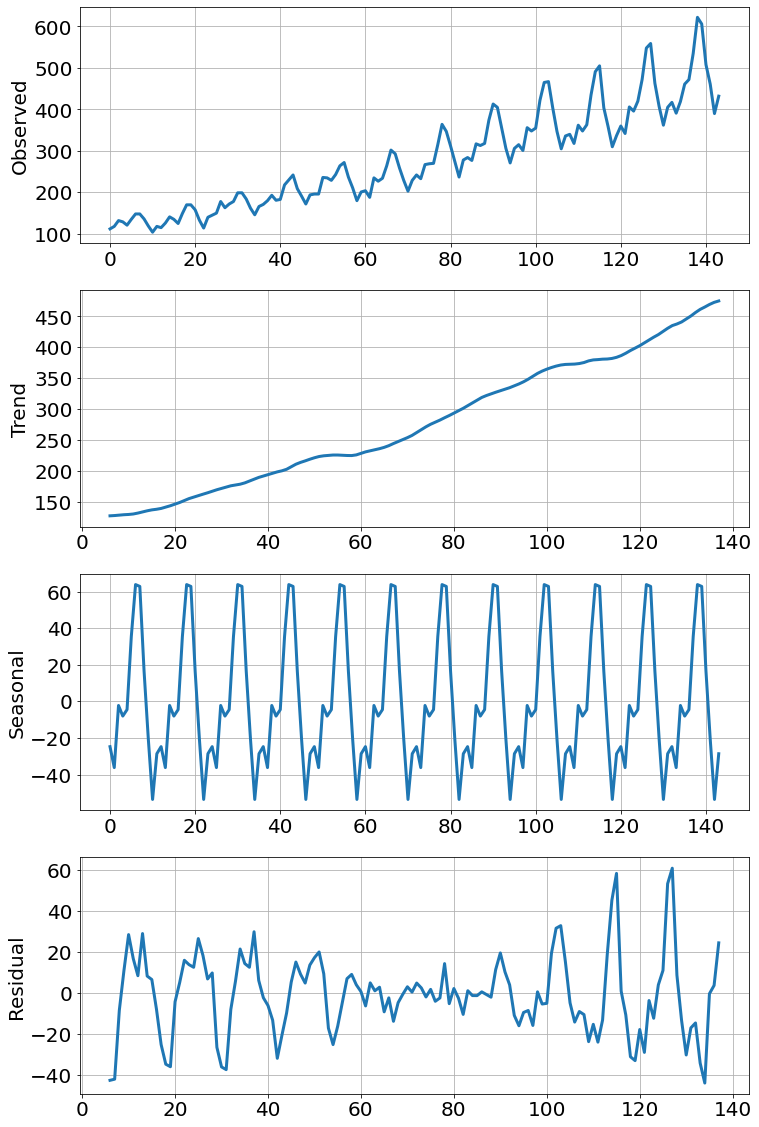

In [ ]:
import statsmodels
print(statsmodels.__version__)
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(flight_data['#Passengers'], freq=12) 
plot_decompose(decomposition)

In [ ]:
flight_data.set_index('Month', inplace=True) #set date as index


In [ ]:
flight_data.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(flight_data)

In [ ]:
train = int(len(data)*0.8)
test = len(data)-train
train_data,test_data=data[0:train,:],data[train:len(data),:1]
train,len(data)

(115, 144)

In [ ]:
# converting an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)
 

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

y_train,len(y_test)

(array([0.03281853, 0.05984556, 0.08494208, 0.08494208, 0.06177606,
        0.02895753, 0.        , 0.02702703, 0.02123552, 0.04247104,
        0.07142857, 0.05984556, 0.04054054, 0.08687259, 0.12741313,
        0.12741313, 0.1042471 , 0.05598456, 0.01930502, 0.06949807,
        0.07915058, 0.08880309, 0.14285714, 0.11389961, 0.13127413,
        0.14285714, 0.18339768, 0.18339768, 0.15444015, 0.11196911,
        0.08108108, 0.11969112, 0.12934363, 0.14671815, 0.17181467,
        0.14864865, 0.15250965, 0.22007722, 0.24324324, 0.26640927,
        0.2027027 , 0.16795367, 0.13127413, 0.17374517, 0.17760618,
        0.17760618, 0.25482625, 0.25289575, 0.24131274, 0.26833977,
        0.30888031, 0.32432432, 0.25675676, 0.20656371, 0.14671815,
        0.18725869, 0.19305019, 0.16216216, 0.25289575, 0.23745174,
        0.25096525, 0.30888031, 0.38223938, 0.36486486, 0.2992278 ,
        0.24131274, 0.19111969, 0.24131274, 0.26640927, 0.24903475,
        0.31467181, 0.31853282, 0.32046332, 0.40

In [ ]:
X_train.shape, y_train.shape


((110, 4), (110,))

In [ ]:
# reshape input to be [sample, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

X_train.shape

(110, 4, 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=1,verbose=1)

Epoch 1/100
110/110 [==============================] - 8s 15ms/step - loss: 0.0185 - val_loss: 0.0310
Epoch 2/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0090 - val_loss: 0.0348
Epoch 3/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0083 - val_loss: 0.0348
Epoch 4/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0078 - val_loss: 0.0305
Epoch 5/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0085 - val_loss: 0.0281
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0083 - val_loss: 0.0591
Epoch 7/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0068 - val_loss: 0.0350
Epoch 8/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0065 - val_loss: 0.0245
Epoch 9/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0091 - val_loss: 0.0262
Epoch 10/100
110/110 [==============================] - 1s 7ms/step - loss: 0.0064 - val_l

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

test_predict

array([[0.37836647],
       [0.48744076],
       [0.506312  ],
       [0.43840724],
       [0.64018625],
       [0.5159978 ],
       [0.6209316 ],
       [0.7228666 ],
       [0.8506345 ],
       [0.72268164],
       [0.45741507],
       [0.50969255],
       [0.462257  ],
       [0.625891  ],
       [0.58178943],
       [0.50265443],
       [0.62449616],
       [0.69130224],
       [0.6521361 ],
       [0.82696545],
       [0.93277574],
       [0.690391  ],
       [0.511389  ],
       [0.5932662 ]], dtype=float32)

In [ ]:
#Transforming data back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

test_predict

array([[299.99384],
       [356.49432],
       [366.26962],
       [331.09497],
       [435.6165 ],
       [371.2869 ],
       [425.6426 ],
       [478.44492],
       [544.62866],
       [478.3491 ],
       [340.941  ],
       [368.02075],
       [343.44913],
       [428.21155],
       [405.36694],
       [364.375  ],
       [427.489  ],
       [462.09457],
       [441.80652],
       [532.3681 ],
       [587.1778 ],
       [461.62256],
       [368.89954],
       [411.3119 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_train,train_predict))

253.8895822127599

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

423.19970507169114

In [ ]:
x = np.arange(train+5,len(data),1)
print(x)

[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143]


<Figure size 1440x360 with 0 Axes>

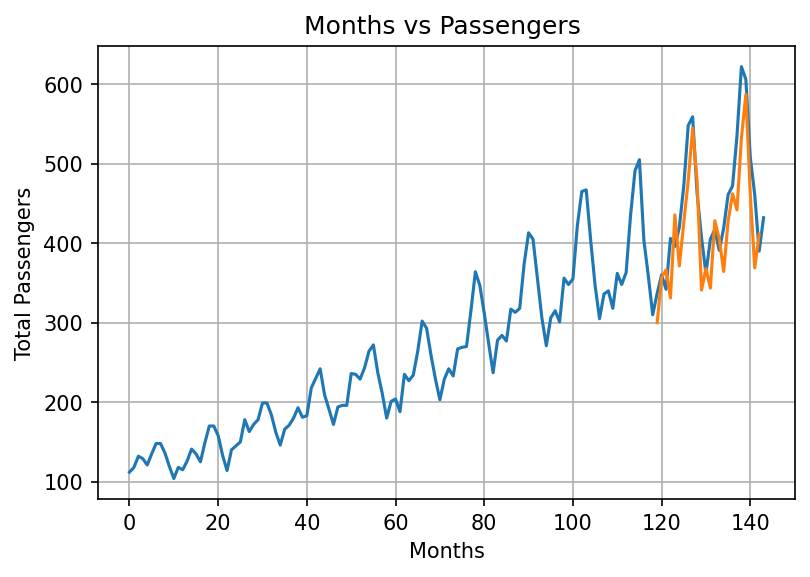

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,5))
plt.figure(dpi=150)
plt.xlabel("Months")
plt.ylabel("Total Passengers")
plt.title("Months vs Passengers ")
plt.plot(scaler.inverse_transform(data)) #original data
plt.plot(testPredictPlot) #test prediction
plt.grid()
plt.show()


#EXCERCISE8

In [ ]:
!wget https://dumps.wikimedia.org/viwiki/20200501/viwiki-20200501-pages-articles.xml.bz2


--2022-04-01 15:25:17--  https://dumps.wikimedia.org/viwiki/20200501/viwiki-20200501-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-04-01 15:25:18 ERROR 404: Not Found.



In [ ]:
cd /content

/content


In [ ]:
!git clone https://github.com/attardi/wikiextractor.git


Cloning into 'wikiextractor'...
remote: Enumerating objects: 766, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 766 (delta 13), reused 11 (delta 6), pack-reused 741
Receiving objects: 100% (766/766), 1.31 MiB | 12.33 MiB/s, done.
Resolving deltas: 100% (446/446), done.


In [ ]:
!rm -rf /content/output

In [ ]:
!unzip '/content/gdrive/MyDrive/Kaggle/Automatically inserting Vietnamese accents/them_dau.zip' -d '/content/output'

In [ ]:
import re
import unidecode
import itertools
from nltk import ngrams
import string
import numpy as np
from tqdm import tqdm

In [ ]:
import os

PATH_DATA = "./output"

alphabet = '^[ _abcdefghijklmnopqrstuvwxyz0123456789áàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđ!\"\',\-\.:;?_\(\)]+$'

list_sub_folder = os.listdir(PATH_DATA)

In [ ]:
import os

PATH_DATA = "./output"

alphabet = '^[ _abcdefghijklmnopqrstuvwxyz0123456789áàảãạâấầẩẫậăắằẳẵặóòỏõọôốồổỗộơớờởỡợéèẻẽẹêếềểễệúùủũụưứừửữựíìỉĩịýỳỷỹỵđ!\"\',\-\.:;?_\(\)]+$'

list_sub_folder = os.listdir(PATH_DATA)

for sub_folder in (list_sub_folder):
    path_sub_folder = os.path.join(PATH_DATA, sub_folder)
    
    list_file = os.listdir(path_sub_folder)
    
    for file in tqdm(list_file):
        with open(os.path.join(path_sub_folder, file), "r") as f_r:
            contents = f_r.read()
            contents = re.sub("(\s)+", r"\1", contents)
            contents = contents.split("\n")
            for content in contents:
                try:
                    content = eval(content)
                except:
                    continue
                lines = content["text"].split("\n")
                with open("./train_data.txt", "a") as f_w:
                    for line in lines[1:]:
                        if len(line.split()) > 2 and re.match(alphabet, line.lower()):
                            f_w.write(line + "\n")

100%|██████████| 100/100 [00:41<00:00,  2.39it/s]


In [ ]:
!pip install unidecode

In [ ]:
import re
import unidecode
import itertools
from nltk import ngrams
import nltk
import string
import numpy as np
from tqdm import tqdm

In [ ]:
with open("./train_data.txt", "r") as f_r:
    lines = f_r.read().split("\n")
    
print(len(lines))

2172793


In [ ]:
lines = lines[:1172793]

In [ ]:
MAXLEN = 30
NGRAM = 5
BATCH_SIZE = 1024

In [ ]:
def remove_accent(text):
    return unidecode.unidecode(text)

In [ ]:
def extract_phrases(text):
    return re.findall(r'\w[\w ]+', text)

In [ ]:
phrases = itertools.chain.from_iterable(extract_phrases(text) for text in lines)
phrases = [p.strip() for p in phrases if len(p.split()) > 1]


In [ ]:
def gen_ngrams(words, n=5):
    return ngrams(words.split(), n)
    
list_ngrams = []
for p in tqdm(phrases):
  if not re.match(alphabet, p.lower()):
    continue
  for ngr in gen_ngrams(p, NGRAM):
    if len(" ".join(ngr)) < 32:
      list_ngrams.append(" ".join(ngr))
del phrases
list_ngrams = list(set(list_ngrams))

100%|██████████| 5840568/5840568 [01:22<00:00, 71190.30it/s]


In [ ]:
!pip install nltk==3.4

In [ ]:
accented_chars_vietnamese = [
    'á', 'à', 'ả', 'ã', 'ạ', 'â', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ă', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ',
    'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ô', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ơ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ',
    'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ê', 'ế', 'ề', 'ể', 'ễ', 'ệ',
    'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ư', 'ứ', 'ừ', 'ử', 'ữ', 'ự',
    'í', 'ì', 'ỉ', 'ĩ', 'ị',
    'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ',
    'đ',
]
accented_chars_vietnamese.extend([c.upper() for c in accented_chars_vietnamese])
alphabet = list(('\x00 _' + string.ascii_letters + string.digits + ''.join(accented_chars_vietnamese)))


In [ ]:
def encode(text, maxlen=MAXLEN):
        text = "\x00" + text
        x = np.zeros((maxlen, len(alphabet)))
        for i, c in enumerate(text[:maxlen]):
            x[i, alphabet.index(c)] = 1
        if i < maxlen - 1:
          for j in range(i+1, maxlen):
            x[j, 0] = 1
        return x

def decode(x, calc_argmax=True):
    if calc_argmax:
        x = x.argmax(axis=-1)
    return ''.join(alphabet[i] for i in x)


In [ ]:
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense, RepeatVector, recurrent, LSTM, Bidirectional
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

HIDDEN_SIZE = 256

model = Sequential()
model.add(LSTM(HIDDEN_SIZE, input_shape=(MAXLEN, len(alphabet)), return_sequences=True))
model.add(Bidirectional(LSTM(HIDDEN_SIZE, return_sequences=True, dropout=0.25, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(len(alphabet))))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 256)           466944    
                                                                 
 bidirectional (Bidirectiona  (None, 30, 512)          1050624   
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 30, 199)          102087    
 ibuted)                                                         
                                                                 
 activation (Activation)     (None, 30, 199)           0         
                                                                 
Total params: 1,619,655
Trainable params: 1,619,655
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from sklearn.model_selection import train_test_split

train_data, valid_data = train_test_split(list_ngrams, test_size=0.2, random_state=2019)


In [ ]:
def generate_data(data, batch_size=128):
    cur_index = 0
    while True:
        
        x, y = [], []
        for i in range(batch_size):  
            y.append(encode(data[cur_index]))
            x.append(encode(unidecode.unidecode(data[cur_index])))
            cur_index += 1
            
            if cur_index > len(data)-1:
                cur_index = 0
        
        yield np.array(x), np.array(y)

In [ ]:
train_generator = generate_data(train_data, batch_size=BATCH_SIZE)
validation_generator = generate_data(valid_data, batch_size=BATCH_SIZE)

checkpointer = ModelCheckpoint(filepath=os.path.join('./model_{val_loss:.4f}_{val_acc:.4f}.h5'), save_best_only=True, verbose=1)
early = EarlyStopping(patience=2, verbose=1)

model.fit_generator(train_generator, steps_per_epoch=len(train_data)//BATCH_SIZE, epochs=10,
                    validation_data=validation_generator, validation_steps=len(valid_data)//BATCH_SIZE,
                    callbacks=[checkpointer, early])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
 1103/18817 [>.............................] - ETA: 36:50:25 - loss: 0.5999 - accuracy: 0.8550

KeyboardInterrupt: ignored

In [ ]:
from collections import Counter

def extract_phrases(text):
    pattern = r'\w[\w ]*|\s\W+|\W+'
    return re.findall(pattern, text)

def guess(ngram):
    text = ' '.join(ngram)
    preds = model.predict(np.array([encode(text)]), verbose=0)
    return decode(preds[0], calc_argmax=True).strip('\x00')


def add_accent(text):
    ngrams = list(gen_ngrams(text.lower(), n=NGRAM))
    guessed_ngrams = list(guess(ngram) for ngram in ngrams)
    candidates = [Counter() for _ in range(len(guessed_ngrams) + NGRAM - 1)]
    for nid, ngram in enumerate(guessed_ngrams):
        for wid, word in enumerate(re.split(' +', ngram)):
            candidates[nid + wid].update([word])
    output = ' '.join(c.most_common(1)[0][0] for c in candidates)
    return output

def accent_sentence(sentence):
  list_phrases = extract_phrases(sentence)
  output = ""
  for phrases in list_phrases:
    if len(phrases.split()) < 2 or not re.match("\w[\w ]+", phrases):
      output += phrases
    else:
      output += add_accent(phrases)
      if phrases[-1] == " ":
        output += " "
  return output

In [ ]:
text = "cong hoa xa hoi chu nghia viet nam toi ten la nguyen thi hoa"
print((accent_sentence(text)))

công hòa xã hội chủ nghĩa việt năm tới tên là nguyên thì hoa


Mô hình chạy rất lâu nên mình chỉ chạy 1/10 epoch ( 0.1 epoch thôi ) Nhưng kết quả cũng khá là ok